Mounted at /content/drive


In [1]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark
findspark.init()


from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("my_first_pyspark")\
        .config('spark.ui.port','4050')\
        .getOrCreate()

sc = spark.sparkContext

In [ ]:
df=spark.read.csv('/content/drive/MyDrive/Colab Notebooks/데이터분석을위한프로그래밍/data-final.csv', sep ='\t', header = True)
df.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+-------------------+-------+-------+-----------+----------+---------+---+-------+--------------------+---------------------+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|EXT1_E|E

In [ ]:
df = df.filter((df.country=='KR') | (df.country=='US') )

df.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+-------+-------------------+-------+-------+-----------+----------+---------+---+-------+--------------------+---------------------+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|EXT1_E|E

In [ ]:
df_selected = df.select(df.columns[:50])
df_selected.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
|EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|
+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
|   4|   3|   4|   3|   3|   3|   5|   3|   4|    3|   2|   4|   4|   2|   4|   2|   2|   2|   4|    4|   1|   2|   1|   5|   3|   5|   3|   4|   4|    5|   3|   2|   4|   2|   1|   4|   4|   2|   2|    5|   5|   2|   4|   3|   4

# 1.Dimension reduction (PCA)
Params
- k: 찾고자하는principal components 개수
- inputCol:입력Vectors 컬럼
- outputCol:출력Vectors 컬럼(projection된k-dimensional vector

In [ ]:
# ex
import numpy as np
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt 
from pyspark.ml.linalg import Vectors
x,y = np.random.multivariate_normal([0,0],[[6,-2],[-2,1]],100).T
dataset =spark.createDataFrame( [ [Vectors.dense([x,y])] for x,y in zip(x,y) ],['point'])

print(x)
print("ㅡㅡㅡ")
print(y)
print("ㅡㅡㅡ")
print(   [Vectors.dense([x,y])] for x,y in zip(x,y)   )
print("ㅡㅡㅡ")
print(dataset.show())
print("ㅡㅡㅡ")
print(dataset.count())
print("ㅡㅡㅡ")
dataset.take(1)

[ 0.53566286  0.25963573 -1.14543768 -1.93468184  0.18277449 -3.84124619
 -3.91694329 -3.10435618  1.80770742 -0.23380989  2.49702477 -1.99817588
  1.40168215 -0.39512947  0.76610189  4.5166623   0.7138537  -1.21177166
 -2.11833489  4.65851817 -1.29455033  1.63023116  0.50712598 -3.05283254
 -2.16452428  4.59408193 -1.24989457  1.96319702 -0.67207712  1.16507987
 -1.79404018  3.75761135  0.80815309  0.56820393  4.52802761  0.49466513
  3.11859586  3.15182831 -1.42242337 -4.75382725  4.27667425  1.20348625
  2.2183308  -1.14415858  0.2485901   3.31291459  3.57434146  0.24634943
 -0.31135911 -1.08173351 -1.26562118  0.53342429 -1.07739427  1.82522854
  0.10479239  5.47013381 -1.98460281 -1.03184669  1.74263461 -2.13636912
  0.11365644  1.27399236 -1.65252989  1.53925289  2.5939939   0.68505035
 -0.49357232 -0.60264893  0.03538969  1.38861469  1.64067983  1.14750831
  1.40726296  1.57393412  0.7765123   0.86004861  0.1413065  -1.34510296
  0.29567187  2.82903298 -0.97042002 -0.82328461 -3

[Row(point=DenseVector([0.5357, -0.8506]))]

In [ ]:
pca = PCA(k=1, inputCol = "point", outputCol ="features")
model =pca.fit(dataset)
reduced = model.transform(dataset)
reduced.show()

+--------------------+--------------------+
|               point|            features|
+--------------------+--------------------+
|[0.53566285746911...|[-0.7857364282386...|
|[0.25963572598254...|[-0.1987843195577...|
|[-1.1454376751074...|[1.3258667637252364]|
|[-1.9346818446507...| [1.997538696853036]|
|[0.18277449021157...|[-0.3763333378137...|
|[-3.8412461874861...| [4.270492474946363]|
|[-3.9169432922697...| [3.871407649950062]|
|[-3.1043561833082...|   [3.3716703289916]|
|[1.80770742160997...|[-1.977379169661488]|
|[-0.2338098895821...|[0.37549676653615...|
|[2.49702477270170...|[-2.578843430031006]|
|[-1.9981758830896...|[2.1722196957186535]|
|[1.40168214892493...|[-1.4710976496611...|
|[-0.3951294733309...|[0.47851426436814...|
|[0.76610189348238...|[-0.9537804949831...|
|[4.51666230068864...|[-4.842971226942255]|
|[0.71385369696264...|[-0.6021704528613...|
|[-1.2117716551180...|[1.2648858706087798]|
|[-2.1183348858764...|[2.1315219302566377]|
|[4.65851817138604...|[-5.200301

Exception ignored in: <function JavaWrapper.__del__ at 0x7fa1296cf8c0>
Traceback (most recent call last):
  File "/content/spark-3.3.1-bin-hadoop3/python/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'PCA' object has no attribute '_java_obj'


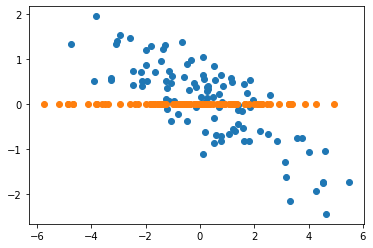

In [ ]:
import matplotlib.pyplot as plt
def asd(x):
  t=[]
  z=[]
  for i in range(x.count()) :
    t.append(x.collect()[:][i][0][0])
    z.append(x.collect()[:][i][0][1])
  plt.scatter(t,z)

asd(dataset)
qqq=[]
zzz=[]
xxx= reduced.select("features")
for i in range(xxx.count()) :
    zzz.append(xxx.collect()[:][i][0][0])
    qqq.append(0)
plt.scatter(zzz,qqq)

#2.Clustering
- kmeans
- gaussian mix


In [ ]:
x1,y1 =np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],100).T
x2,y2 =np.random.multivariate_normal([1,1],[[1,0],[0,1]],100).T

dataset =spark.createDataFrame( 
    [    [Vectors.dense([x,y])] for x,y in zip(np.hstack([x1,x2]),np.hstack([x1,x2]))    ],
    ['point'])


In [ ]:
dataset.show()
dataset.take(1)

+--------------------+
|               point|
+--------------------+
|[1.07568820461143...|
|[0.03176549594060...|
|[-1.9394712301308...|
|[-0.5761052358934...|
|[-0.5256944465665...|
|[-2.0491486865975...|
|[1.02030602381113...|
|[-1.2606025872777...|
|[-2.5151292612757...|
|[-3.2436724720947...|
|[-1.7881326557728...|
|[-1.2320677666352...|
|[-3.5660961110236...|
|[-0.3837319666943...|
|[-2.6349484739733...|
|[-2.1498838966669...|
|[-0.7850542136431...|
|[0.61616568608877...|
|[-1.8344888314675...|
|[0.46436134811907...|
+--------------------+
only showing top 20 rows



[Row(point=DenseVector([1.0757, 1.0757]))]

In [ ]:
from pyspark.ml.clustering import KMeans

km = KMeans(k=2, featuresCol ="point")
model =km.fit(dataset)
clustered = model.transform(dataset)
clustered.show()

+--------------------+----------+
|               point|prediction|
+--------------------+----------+
|[1.07568820461143...|         0|
|[0.03176549594060...|         0|
|[-1.9394712301308...|         1|
|[-0.5761052358934...|         1|
|[-0.5256944465665...|         1|
|[-2.0491486865975...|         1|
|[1.02030602381113...|         0|
|[-1.2606025872777...|         1|
|[-2.5151292612757...|         1|
|[-3.2436724720947...|         1|
|[-1.7881326557728...|         1|
|[-1.2320677666352...|         1|
|[-3.5660961110236...|         1|
|[-0.3837319666943...|         1|
|[-2.6349484739733...|         1|
|[-2.1498838966669...|         1|
|[-0.7850542136431...|         1|
|[0.61616568608877...|         0|
|[-1.8344888314675...|         1|
|[0.46436134811907...|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
x1,y1 =np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],100).T
x2,y2 =np.random.multivariate_normal([1,1],[[1,0],[0,1]],100).T

dataset =spark.createDataFrame( [ [Vectors.dense([x,y])] for x,y in zip(x1,y1) ],['point'])

dataset =dataset.union( 
    spark.createDataFrame( [ [Vectors.dense([x,y])] for x,y in zip(x2,y2) ],['point'])
)
dataset.show()
dataset.take(1)

+--------------------+
|               point|
+--------------------+
|[-1.5197151001758...|
|[0.84468357731596...|
|[-1.0932059637052...|
|[-0.8671817096419...|
|[-1.9704631715627...|
|[-0.0227488236125...|
|[-0.6990809130080...|
|[-1.6534893269758...|
|[-0.0017205054648...|
|[-0.8435496219161...|
|[-0.9785050228469...|
|[-0.5181732392760...|
|[-1.3272114560288...|
|[-0.7583518490103...|
|[-1.3180588103651...|
|[0.03302406539126...|
|[-1.2244745201847...|
|[-0.9996835121517...|
|[-1.1940751944910...|
|[-2.9140902563563...|
+--------------------+
only showing top 20 rows



[Row(point=DenseVector([-1.5197, -1.0975]))]

In [ ]:
from pyspark.ml.clustering import GaussianMixture

gm = GaussianMixture(featuresCol ="point",k=2, tol = 0.0001,seed =10)
model =gm.fit(dataset)
prob = model.transform(dataset)
prob.show()
prob.take(1)

+--------------------+--------------------+----------+
|               point|         probability|prediction|
+--------------------+--------------------+----------+
|[-1.5197151001758...|[0.00130759806731...|         1|
|[0.84468357731596...|[0.85496041404765...|         0|
|[-1.0932059637052...|[0.01490307901152...|         1|
|[-0.8671817096419...|[0.00673808212563...|         1|
|[-1.9704631715627...|[1.25517072301099...|         1|
|[-0.0227488236125...|[0.02871024612957...|         1|
|[-0.6990809130080...|[0.00350600842161...|         1|
|[-1.6534893269758...|[0.11145787727747...|         1|
|[-0.0017205054648...|[0.45520910413234...|         1|
|[-0.8435496219161...|[0.88723506955978...|         0|
|[-0.9785050228469...|[0.02075899806462...|         1|
|[-0.5181732392760...|[0.05991001399775...|         1|
|[-1.3272114560288...|[0.00515693871957...|         1|
|[-0.7583518490103...|[0.03625713406808...|         1|
|[-1.3180588103651...|[0.01545317991573...|         1|
|[0.033024

[Row(point=DenseVector([-1.5197, -1.0975]), probability=DenseVector([0.0013, 0.9987]), prediction=1)]

In [ ]:
mu1 = model.gaussiansDF.collect()[0][0].toArray()
cov1 = model.gaussiansDF.collect()[0][1].toArray()
mu2 = model.gaussiansDF.collect()[1][0].toArray()
cov2 = model.gaussiansDF.collect()[1][1].toArray()
print(mu1)
print(cov1)
print(mu2)
print(cov2)

[0.92779039 1.08506098]
[[ 0.84120933 -0.0466986 ]
 [-0.0466986   0.81497846]]
[-0.96437576 -0.88331995]
[[1.0381699  0.06398852]
 [0.06398852 0.82700105]]


#3. (quiz) Correlation between Clusters and Country

Given
- Big five personality test records
  - where country is KR or US
- Cluster result with KMeansand GaussianMixture▪

Goal

- For each clustering method, analyze the correlation between country attribute and the probability distributions that a person belongs to Group 1 or 2

In [ ]:
 #ex
import random
 
dataset =spark.createDataFrame( [ [Vectors.dense([random.random() for _ in range(4)])] for _ in range(10) ],['features'])
dataset.show()
print(dataset.take(1))
print("ddddddddddddddddddddddd")
from pyspark.ml.stat import Correlation

Correlation.corr(dataset,'features','pearson').first()

+--------------------+
|            features|
+--------------------+
|[0.65532659099203...|
|[0.01500183620755...|
|[0.27511006570586...|
|[0.66785734766638...|
|[0.15414451022799...|
|[0.21846819357073...|
|[0.16897386052804...|
|[0.69113646238455...|
|[0.27454987936083...|
|[0.30732014589008...|
+--------------------+

[Row(features=DenseVector([0.6553, 0.0826, 0.0299, 0.2393]))]
ddddddddddddddddddddddd


Row(pearson(features)=DenseMatrix(4, 4, [1.0, -0.4792, 0.008, -0.1477, -0.4792, 1.0, -0.0008, 0.6313, 0.008, -0.0008, 1.0, 0.0894, -0.1477, 0.6313, 0.0894, 1.0], False))

In [ ]:
from pyspark.ml.stat import Correlation

Correlation.corr(dataset,'features','pearson').first()


Row(pearson(features)=DenseMatrix(4, 4, [1.0, -0.4792, 0.008, -0.1477, -0.4792, 1.0, -0.0008, 0.6313, 0.008, -0.0008, 1.0, 0.0894, -0.1477, 0.6313, 0.0894, 1.0], False))

+--------------------+
|            features|
+--------------------+
|[0.65532659099203...|
|[0.01500183620755...|
|[0.27511006570586...|
|[0.66785734766638...|
|[0.15414451022799...|
|[0.21846819357073...|
|[0.16897386052804...|
|[0.69113646238455...|
|[0.27454987936083...|
|[0.30732014589008...|
+--------------------+

